In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, RationalQuadratic
import itertools as it
from itertools import combinations

from sklearn.preprocessing import StandardScaler
import torch

## Load the Data

In [3]:
# File paths
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_6/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_6/initial_outputs.npy"

# Load the data
inputs = np.load(input_file_path)
outputs = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df = pd.DataFrame(inputs, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df['Output'] = outputs

df

,Input_1,Input_2,Input_3,Input_4,Input_5,Output
0,0.728186,0.154693,0.732552,0.693997,0.056401,-0.714265
1,0.242384,0.844100,0.577809,0.679021,0.501953,-1.209955
2,0.729523,0.748106,0.679775,0.356552,0.671054,-1.672200
3,0.770620,0.114404,0.046780,0.648324,0.273549,-1.536058
4,0.618812,0.331802,0.187288,0.756238,0.328835,-0.829237
5,0.784958,0.910682,0.708120,0.959225,0.004911,-1.247049
6,0.145111,0.896685,0.896322,0.726272,0.236272,-1.233786
7,0.945069,0.288459,0.978806,0.961656,0.598016,-1.694343
8,0.125720,0.862725,0.028544,0.246605,0.751206,-2.571170
9,0.757594,0.355831,0.016523,0.434207,0.112433,-1.309116


In [4]:
# Historical feedback

#Datos pre-competencia que aparecieron
new_data_0=pd.DataFrame([{'Input_1':0.111111,'Input_2':0.111111,'Input_3':0.111111,'Input_4':0.111111,'Input_5':0.111111,'Output':-1.7915148}]) 
df=pd.concat([df,new_data_0],ignore_index=True)

# All feedback
df.loc[len(df)]=[5.00000e-04,7.36605e-01,5.00000e-04,9.99500e-01,5.00000e-04,-1.732852018]
df.loc[len(df)]=[0.95,0.05,0.95,0.05,0.95,-2.771989332]
df.loc[len(df)]=[1.57895e-01,1.00000e-06,7.36842e-01,9.99999e-01,1.05264e-01,-0.928094574]
df.loc[len(df)]=[9.99999e-01,1.00000e-06,1.00000e-06,1.00000e-06,9.99999e-01,-3.303814476]
df.loc[len(df)]=[2.10527e-01,1.00000e-06,9.99999e-01,1.00000e-06,1.00000e-06,-1.785861723]
df.loc[len(df)]=[0.95,0.05,0.239474,0.95,0.95,-2.263445803]

df.loc[len(df)]=[5.00000e-04,7.36605e-01,5.00000e-04,9.99500e-01,5.00000e-04,-1.81435389743297]
df.loc[len(df)]=[0.95,0.05,0.95,0.05,0.95,-2.67716692922429]
df.loc[len(df)]=[1.57895e-01,1.00000e-06,7.36842e-01,9.99999e-01,1.05264e-01,-0.911267379749337]
df.loc[len(df)]=[9.99999e-01,1.00000e-06,1.00000e-06,1.00000e-06,9.99999e-01,-3.28707427661792]
df.loc[len(df)]=[2.10527e-01,1.00000e-06,9.99999e-01,1.00000e-06,1.00000e-06,-1.76943358452703]
df.loc[len(df)]=[0.95,0.05,0.239474,0.95,0.95,-2.24821953601774]
df.loc[len(df)]=[0.68421,0.263158,0.631579,0.736842,0.105264,-0.412156475042914]
df.loc[len(df)]=[5.26316e-01,2.10527e-01,6.84210e-01,8.42105e-01,1.00000e-06,-0.427166537063684]

df.loc[len(df)]=[5.00000e-04,7.36605e-01,5.00000e-04,9.99500e-01,5.00000e-04,-1.74716766467499]
df.loc[len(df)]=[0.95,0.05,0.95,0.05,0.95,-2.7334412847328]
df.loc[len(df)]=[1.57895e-01,1.00000e-06,7.36842e-01,9.99999e-01,1.05264e-01,-1.06259880968994]
df.loc[len(df)]=[9.99999e-01,1.00000e-06,1.00000e-06,1.00000e-06,9.99999e-01,-3.24007611253924]
df.loc[len(df)]=[2.10527e-01,1.00000e-06,9.99999e-01,1.00000e-06,1.00000e-06,-1.79776799897557]
df.loc[len(df)]=[0.95,0.05,0.239474,0.95,0.95,-2.35727635860617]
df.loc[len(df)]=[0.68421,0.263158,0.631579,0.736842,0.105264,-0.324261055542013]
df.loc[len(df)]=[5.26316e-01,2.10527e-01,6.84210e-01,8.42105e-01,1.00000e-06,-0.519706430322836]
df.loc[len(df)]=[5.78947e-01,2.10527e-01,7.36842e-01,7.89473e-01,1.00000e-06,-0.503453497368484]

df.loc[len(df)]=[5.00000e-04,7.36605e-01,5.00000e-04,9.99500e-01,5.00000e-04,-1.7252056]
df.loc[len(df)]=[0.95,0.05,0.95,0.05,0.95,-2.7356281]
df.loc[len(df)]=[1.57895e-01,1.00000e-06,7.36842e-01,9.99999e-01,1.05264e-01,-0.9859462]
df.loc[len(df)]=[9.99999e-01,1.00000e-06,1.00000e-06,1.00000e-06,9.99999e-01,-3.317555]
df.loc[len(df)]=[2.10527e-01,1.00000e-06,9.99999e-01,1.00000e-06,1.00000e-06,-1.7222976]
df.loc[len(df)]=[0.95,0.05,0.239474,0.95,0.95,-2.2913936]
df.loc[len(df)]=[0.68421,0.263158,0.631579,0.736842,0.105264,-0.4044686]
df.loc[len(df)]=[5.26316e-01,2.10527e-01,6.84210e-01,8.42105e-01,1.00000e-06,-0.4973901]
df.loc[len(df)]=[5.78947e-01,2.10527e-01,7.36842e-01,7.89473e-01,1.00000e-06,-0.5237692]
df.loc[len(df)]=[6.31579e-01,1.57895e-01,7.36842e-01,7.36842e-01,1.00000e-06,-0.6751735]
df.loc[len(df)]=[0.421053,0.368421,0.578947,0.68421,0.105264,-0.1999106]

df.loc[len(df)]=[5.00000e-04,7.36605e-01,5.00000e-04,9.99500e-01,5.00000e-04,-1.7416933]
df.loc[len(df)]=[0.95,0.05,0.95,0.05,0.95,-2.7265424]
df.loc[len(df)]=[1.57895e-01,1.00000e-06,7.36842e-01,9.99999e-01,1.05264e-01,-0.820235]
df.loc[len(df)]=[9.99999e-01,1.00000e-06,1.00000e-06,1.00000e-06,9.99999e-01,-3.3199713]
df.loc[len(df)]=[2.10527e-01,1.00000e-06,9.99999e-01,1.00000e-06,1.00000e-06,-1.8249186]
df.loc[len(df)]=[0.95,0.05,0.239474,0.95,0.95,-2.266848]
df.loc[len(df)]=[0.68421,0.263158,0.631579,0.736842,0.105264,-0.4497635]
df.loc[len(df)]=[5.26316e-01,2.10527e-01,6.84210e-01,8.42105e-01,1.00000e-06,-0.5668695]
df.loc[len(df)]=[5.78947e-01,2.10527e-01,7.36842e-01,7.89473e-01,1.00000e-06,-0.4468997]
df.loc[len(df)]=[6.31579e-01,1.57895e-01,7.36842e-01,7.36842e-01,1.00000e-06,-0.6738236]
df.loc[len(df)]=[0.421053,0.368421,0.578947,0.68421,0.105264,-0.1162172]
df.loc[len(df)]=[0.405,0.405,0.66,0.957499,0.320001,-0.4912594]
df.loc[len(df)]=[0.4475,0.362501,0.6175,0.7875,0.235001,-0.1755872]

df.loc[len(df)]=[5.00000e-04,7.36605e-01,5.00000e-04,9.99500e-01,5.00000e-04,-1.66911637006301]
df.loc[len(df)]=[0.95,0.05,0.95,0.05,0.95,-2.73892558394699]
df.loc[len(df)]=[1.57895e-01,1.00000e-06,7.36842e-01,9.99999e-01,1.05264e-01,-0.803546300281055]
df.loc[len(df)]=[9.99999e-01,1.00000e-06,1.00000e-06,1.00000e-06,9.99999e-01,-3.28200399827205]
df.loc[len(df)]=[2.10527e-01,1.00000e-06,9.99999e-01,1.00000e-06,1.00000e-06,-1.85384937564564]
df.loc[len(df)]=[0.95,0.05,0.239474,0.95,0.95,-2.18626491691575]
df.loc[len(df)]=[0.68421,0.263158,0.631579,0.736842,0.105264,-0.370927586419834]
df.loc[len(df)]=[5.26316e-01,2.10527e-01,6.84210e-01,8.42105e-01,1.00000e-06,-0.473889726354679]
df.loc[len(df)]=[5.78947e-01,2.10527e-01,7.36842e-01,7.89473e-01,1.00000e-06,-0.524316946928077]
df.loc[len(df)]=[6.31579e-01,1.57895e-01,7.36842e-01,7.36842e-01,1.00000e-06,-0.639369561344938]
df.loc[len(df)]=[0.421053,0.368421,0.578947,0.68421,0.105264,-0.226321623464045]
df.loc[len(df)]=[0.405,0.405,0.66,0.957499,0.320001,-0.389937177083709]
df.loc[len(df)]=[0.4475,0.362501,0.6175,0.7875,0.235001,-0.229174567547328]
df.loc[len(df)]=[0.502496,0.439999,0.665,0.65,0.15,-0.394221772737508]

df.loc[len(df)]=[5.00000e-04,7.36605e-01,5.00000e-04,9.99500e-01,5.00000e-04,-1.73414378208623]
df.loc[len(df)]=[0.95,0.05,0.95,0.05,0.95,-2.70805313442861]
df.loc[len(df)]=[1.57895e-01,1.00000e-06,7.36842e-01,9.99999e-01,1.05264e-01,-0.886625891845377]
df.loc[len(df)]=[9.99999e-01,1.00000e-06,1.00000e-06,1.00000e-06,9.99999e-01,-3.23564430169305]
df.loc[len(df)]=[2.10527e-01,1.00000e-06,9.99999e-01,1.00000e-06,1.00000e-06,-1.79439376118114]
df.loc[len(df)]=[0.95,0.05,0.239474,0.95,0.95,-2.20091078582209]
df.loc[len(df)]=[0.68421,0.263158,0.631579,0.736842,0.105264,-0.438523786757553]
df.loc[len(df)]=[5.26316e-01,2.10527e-01,6.84210e-01,8.42105e-01,1.00000e-06,-0.400477231720071]
df.loc[len(df)]=[5.78947e-01,2.10527e-01,7.36842e-01,7.89473e-01,1.00000e-06,-0.455875533228756]
df.loc[len(df)]=[6.31579e-01,1.57895e-01,7.36842e-01,7.36842e-01,1.00000e-06,-0.648660873353933]
df.loc[len(df)]=[0.421053,0.368421,0.578947,0.68421,0.105264,-0.155024793335994]
df.loc[len(df)]=[0.405,0.405,0.66,0.957499,0.320001,-0.435337646709832]
df.loc[len(df)]=[0.4475,0.362501,0.6175,0.7875,0.235001,-0.224325434207521]
df.loc[len(df)]=[0.502496,0.439999,0.665,0.65,0.15,-0.482064063711035]
df.loc[len(df)]=[0.391302,0.256522,0.445652,0.73913,0.108696,-0.448282970210186]

df.loc[len(df)]=[5.00000e-04,7.36605e-01,5.00000e-04,9.99500e-01,5.00000e-04,-1.80871396140813]
df.loc[len(df)]=[0.95,0.05,0.95,0.05,0.95,-2.64050981043394]
df.loc[len(df)]=[1.57895e-01,1.00000e-06,7.36842e-01,9.99999e-01,1.05264e-01,-0.904329690731575]
df.loc[len(df)]=[9.99999e-01,1.00000e-06,1.00000e-06,1.00000e-06,9.99999e-01,-3.2531709534602]
df.loc[len(df)]=[2.10527e-01,1.00000e-06,9.99999e-01,1.00000e-06,1.00000e-06,-1.74296399910212]
df.loc[len(df)]=[0.95,0.05,0.239474,0.95,0.95,-2.15772295986718]
df.loc[len(df)]=[0.68421,0.263158,0.631579,0.736842,0.105264,-0.381089826481856]
df.loc[len(df)]=[5.26316e-01,2.10527e-01,6.84210e-01,8.42105e-01,1.00000e-06,-0.495938773124786]
df.loc[len(df)]=[5.78947e-01,2.10527e-01,7.36842e-01,7.89473e-01,1.00000e-06,-0.395238078756842]
df.loc[len(df)]=[6.31579e-01,1.57895e-01,7.36842e-01,7.36842e-01,1.00000e-06,-0.711180298404215]
df.loc[len(df)]=[0.421053,0.368421,0.578947,0.68421,0.105264,-0.168564173868772]
df.loc[len(df)]=[0.405,0.405,0.66,0.957499,0.320001,-0.448564988773082]
df.loc[len(df)]=[0.4475,0.362501,0.6175,0.7875,0.235001,-0.221910419406859]
df.loc[len(df)]=[0.502496,0.439999,0.665,0.65,0.15,-0.326240511230846]
df.loc[len(df)]=[0.391302,0.256522,0.445652,0.73913,0.108696,-0.376983648634464]
df.loc[len(df)]=[3.78257e-01,4.08696e-01,6.48261e-01,7.73913e-01,1.00000e-06,-0.248554128240674]
df.loc[len(df)]=[0.431734,0.391304,0.634783,0.773913,0.078261,-0.0878226237259777]

df.loc[len(df)]=[5.00000e-04,7.36605e-01,5.00000e-04,9.99500e-01,5.00000e-04,-1.75501797254314]
df.loc[len(df)]=[0.95,0.05,0.95,0.05,0.95,-2.69738103235514]
df.loc[len(df)]=[1.57895e-01,1.00000e-06,7.36842e-01,9.99999e-01,1.05264e-01,-0.921148439261878]
df.loc[len(df)]=[9.99999e-01,1.00000e-06,1.00000e-06,1.00000e-06,9.99999e-01,-3.24527686690795]
df.loc[len(df)]=[2.10527e-01,1.00000e-06,9.99999e-01,1.00000e-06,1.00000e-06,-1.74495368607986]
df.loc[len(df)]=[0.95,0.05,0.239474,0.95,0.95,-2.39776090840319]
df.loc[len(df)]=[0.68421,0.263158,0.631579,0.736842,0.105264,-0.380053985717609]
df.loc[len(df)]=[5.26316e-01,2.10527e-01,6.84210e-01,8.42105e-01,1.00000e-06,-0.479332215776631]
df.loc[len(df)]=[5.78947e-01,2.10527e-01,7.36842e-01,7.89473e-01,1.00000e-06,-0.447166225466186]
df.loc[len(df)]=[6.31579e-01,1.57895e-01,7.36842e-01,7.36842e-01,1.00000e-06,-0.694697432672077]
df.loc[len(df)]=[0.421053,0.368421,0.578947,0.68421,0.105264,-0.189815963186387]
df.loc[len(df)]=[0.405,0.405,0.66,0.957499,0.320001,-0.474620596885218]
df.loc[len(df)]=[0.4475,0.362501,0.6175,0.7875,0.235001,-0.198589518314257]
df.loc[len(df)]=[0.502496,0.439999,0.665,0.65,0.15,-0.39653976859114]
df.loc[len(df)]=[0.391302,0.256522,0.445652,0.73913,0.108696,-0.325700700173843]
df.loc[len(df)]=[3.78257e-01,4.08696e-01,6.48261e-01,7.73913e-01,1.00000e-06,-0.182841501465871]
df.loc[len(df)]=[0.431734,0.391304,0.634783,0.773913,0.078261,-0.155843273586821]
df.loc[len(df)]=[3.76191e-01,4.14286e-01,6.44762e-01,7.74762e-01,1.00000e-06,-0.248105248789274]
df.loc[len(df)]=[0.404762,0.395239,0.635239,0.774762,0.028572,-0.167079772973932]

df.loc[len(df)]=[5.00000e-04,7.36605e-01,5.00000e-04,9.99500e-01,5.00000e-04,-1.82666830087375]
df.loc[len(df)]=[0.95,0.05,0.95,0.05,0.95,-2.5944951663201]
df.loc[len(df)]=[1.57895e-01,1.00000e-06,7.36842e-01,9.99999e-01,1.05264e-01,-0.945924687816107]
df.loc[len(df)]=[9.99999e-01,1.00000e-06,1.00000e-06,1.00000e-06,9.99999e-01,-3.22103689570275]
df.loc[len(df)]=[2.10527e-01,1.00000e-06,9.99999e-01,1.00000e-06,1.00000e-06,-1.71958890372827]
df.loc[len(df)]=[0.95,0.05,0.239474,0.95,0.95,-2.25083399490183]
df.loc[len(df)]=[0.68421,0.263158,0.631579,0.736842,0.105264,-0.390992802184023]
df.loc[len(df)]=[5.26316e-01,2.10527e-01,6.84210e-01,8.42105e-01,1.00000e-06,-0.517809125114699]
df.loc[len(df)]=[5.78947e-01,2.10527e-01,7.36842e-01,7.89473e-01,1.00000e-06,-0.488434439919875]
df.loc[len(df)]=[6.31579e-01,1.57895e-01,7.36842e-01,7.36842e-01,1.00000e-06,-0.600874233406389]
df.loc[len(df)]=[0.421053,0.368421,0.578947,0.68421,0.105264,-0.232127347211402]
df.loc[len(df)]=[0.405,0.405,0.66,0.957499,0.320001,-0.480686100492388]
df.loc[len(df)]=[0.4475,0.362501,0.6175,0.7875,0.235001,-0.203517549810285]
df.loc[len(df)]=[0.502496,0.439999,0.665,0.65,0.15,-0.341549587980089]
df.loc[len(df)]=[0.391302,0.256522,0.445652,0.73913,0.108696,-0.379547912799636]
df.loc[len(df)]=[3.78257e-01,4.08696e-01,6.48261e-01,7.73913e-01,1.00000e-06,-0.206899984329366]
df.loc[len(df)]=[0.431734,0.391304,0.634783,0.773913,0.078261,-0.0849393198097178]
df.loc[len(df)]=[3.76191e-01,4.14286e-01,6.44762e-01,7.74762e-01,1.00000e-06,-0.187222260853463]
df.loc[len(df)]=[0.404762,0.395239,0.635239,0.774762,0.028572,-0.229523476332253]
df.loc[len(df)]=[0.385715,0.404762,0.625715,0.765239,0.040001,-0.171854129555692]

df.loc[len(df)]=[5.00000e-04,7.36605e-01,5.00000e-04,9.99500e-01,5.00000e-04,-1.76231909030401]
df.loc[len(df)]=[0.95,0.05,0.95,0.05,0.95,-2.66917476500354]
df.loc[len(df)]=[1.57895e-01,1.00000e-06,7.36842e-01,9.99999e-01,1.05264e-01,-0.959209376370271]
df.loc[len(df)]=[9.99999e-01,1.00000e-06,1.00000e-06,1.00000e-06,9.99999e-01,-3.30266221724009]
df.loc[len(df)]=[2.10527e-01,1.00000e-06,9.99999e-01,1.00000e-06,1.00000e-06,-1.83221324974667]
df.loc[len(df)]=[0.95,0.05,0.239474,0.95,0.95,-2.28818352879157]
df.loc[len(df)]=[0.68421,0.263158,0.631579,0.736842,0.105264,-0.448123469653505]
df.loc[len(df)]=[5.26316e-01,2.10527e-01,6.84210e-01,8.42105e-01,1.00000e-06,-0.480905345514822]
df.loc[len(df)]=[5.78947e-01,2.10527e-01,7.36842e-01,7.89473e-01,1.00000e-06,-0.521193151309671]
df.loc[len(df)]=[6.31579e-01,1.57895e-01,7.36842e-01,7.36842e-01,1.00000e-06,-0.642560555725546]
df.loc[len(df)]=[0.421053,0.368421,0.578947,0.68421,0.105264,-0.24308762136489]
df.loc[len(df)]=[0.405,0.405,0.66,0.957499,0.320001,-0.484867870277593]
df.loc[len(df)]=[0.4475,0.362501,0.6175,0.7875,0.235001,-0.158496244920813]
df.loc[len(df)]=[0.502496,0.439999,0.665,0.65,0.15,-0.407675707903192]
df.loc[len(df)]=[0.391302,0.256522,0.445652,0.73913,0.108696,-0.408106744404653]
df.loc[len(df)]=[3.78257e-01,4.08696e-01,6.48261e-01,7.73913e-01,1.00000e-06,-0.0785693291524322]
df.loc[len(df)]=[0.431734,0.391304,0.634783,0.773913,0.078261,-0.0776982572719743]
df.loc[len(df)]=[3.76191e-01,4.14286e-01,6.44762e-01,7.74762e-01,1.00000e-06,-0.20647981162684]
df.loc[len(df)]=[0.404762,0.395239,0.635239,0.774762,0.028572,-0.0615442063616646]
df.loc[len(df)]=[0.385715,0.404762,0.625715,0.765239,0.040001,-0.118216158541626]
df.loc[len(df)]=[3.95239e-01,4.04762e-01,6.25715e-01,7.55715e-01,1.00000e-06,-0.235281588118201]

df.loc[len(df)]=[5.00000e-04,7.36605e-01,5.00000e-04,9.99500e-01,5.00000e-04,-1.73320190958244]
df.loc[len(df)]=[0.95,0.05,0.95,0.05,0.95,-2.79266756133967]
df.loc[len(df)]=[1.57895e-01,1.00000e-06,7.36842e-01,9.99999e-01,1.05264e-01,-0.950617029042848]
df.loc[len(df)]=[9.99999e-01,1.00000e-06,1.00000e-06,1.00000e-06,9.99999e-01,-3.27328271674228]
df.loc[len(df)]=[2.10527e-01,1.00000e-06,9.99999e-01,1.00000e-06,1.00000e-06,-1.83584276131547]
df.loc[len(df)]=[0.95,0.05,0.239474,0.95,0.95,-2.24319528314571]
df.loc[len(df)]=[0.68421,0.263158,0.631579,0.736842,0.105264,-0.455276797989188]
df.loc[len(df)]=[5.26316e-01,2.10527e-01,6.84210e-01,8.42105e-01,1.00000e-06,-0.461757255588737]
df.loc[len(df)]=[5.78947e-01,2.10527e-01,7.36842e-01,7.89473e-01,1.00000e-06,-0.531291490446024]
df.loc[len(df)]=[6.31579e-01,1.57895e-01,7.36842e-01,7.36842e-01,1.00000e-06,-0.573194068103213]
df.loc[len(df)]=[0.421053,0.368421,0.578947,0.68421,0.105264,-0.212812022420461]
df.loc[len(df)]=[0.405,0.405,0.66,0.957499,0.320001,-0.357588300553224]
df.loc[len(df)]=[0.4475,0.362501,0.6175,0.7875,0.235001,-0.203180492838603]
df.loc[len(df)]=[0.502496,0.439999,0.665,0.65,0.15,-0.383676405752598]
df.loc[len(df)]=[0.391302,0.256522,0.445652,0.73913,0.108696,-0.381963290638201]
df.loc[len(df)]=[3.78257e-01,4.08696e-01,6.48261e-01,7.73913e-01,1.00000e-06,-0.237654913313458]
df.loc[len(df)]=[0.431734,0.391304,0.634783,0.773913,0.078261,-0.0488406720308418]
df.loc[len(df)]=[3.76191e-01,4.14286e-01,6.44762e-01,7.74762e-01,1.00000e-06,-0.222238070503724]
df.loc[len(df)]=[0.404762,0.395239,0.635239,0.774762,0.028572,-0.17374727771309]
df.loc[len(df)]=[0.385715,0.404762,0.625715,0.765239,0.040001,-0.0887935562431982]
df.loc[len(df)]=[3.95239e-01,4.04762e-01,6.25715e-01,7.55715e-01,1.00000e-06,-0.216630331801965]
df.loc[len(df)]=[3.81429e-01,4.07143e-01,6.32381e-01,7.57620e-01,1.00000e-06,-0.154683231183682]

df.loc[len(df)]=[5.00000e-04,7.36605e-01,5.00000e-04,9.99500e-01,5.00000e-04,-1.73897127728213]
df.loc[len(df)]=[0.95,0.05,0.95,0.05,0.95,-2.79274809397627]
df.loc[len(df)]=[1.57895e-01,1.00000e-06,7.36842e-01,9.99999e-01,1.05264e-01,-0.956768949354101]
df.loc[len(df)]=[9.99999e-01,1.00000e-06,1.00000e-06,1.00000e-06,9.99999e-01,-3.28798197588662]
df.loc[len(df)]=[2.10527e-01,1.00000e-06,9.99999e-01,1.00000e-06,1.00000e-06,-1.74158405217474]
df.loc[len(df)]=[0.95,0.05,0.239474,0.95,0.95,-2.27610888375935]
df.loc[len(df)]=[0.68421,0.263158,0.631579,0.736842,0.105264,-0.401400983844669]
df.loc[len(df)]=[5.26316e-01,2.10527e-01,6.84210e-01,8.42105e-01,1.00000e-06,-0.383113594979095]
df.loc[len(df)]=[5.78947e-01,2.10527e-01,7.36842e-01,7.89473e-01,1.00000e-06,-0.550563578776845]
df.loc[len(df)]=[6.31579e-01,1.57895e-01,7.36842e-01,7.36842e-01,1.00000e-06,-0.638909294031013]
df.loc[len(df)]=[0.421053,0.368421,0.578947,0.68421,0.105264,-0.141256145555328]
df.loc[len(df)]=[0.405,0.405,0.66,0.957499,0.320001,-0.56332889631447]
df.loc[len(df)]=[0.4475,0.362501,0.6175,0.7875,0.235001,-0.186250973967702]
df.loc[len(df)]=[0.502496,0.439999,0.665,0.65,0.15,-0.369119627486635]
df.loc[len(df)]=[0.391302,0.256522,0.445652,0.73913,0.108696,-0.442888672453532]
df.loc[len(df)]=[3.78257e-01,4.08696e-01,6.48261e-01,7.73913e-01,1.00000e-06,-0.266603600851263]
df.loc[len(df)]=[0.431734,0.391304,0.634783,0.773913,0.078261,-0.0820569211415768]
df.loc[len(df)]=[3.76191e-01,4.14286e-01,6.44762e-01,7.74762e-01,1.00000e-06,-0.197875060056891]
df.loc[len(df)]=[0.404762,0.395239,0.635239,0.774762,0.028572,-0.114448039752106]
df.loc[len(df)]=[0.385715,0.404762,0.625715,0.765239,0.040001,-0.130706225712481]
df.loc[len(df)]=[3.95239e-01,4.04762e-01,6.25715e-01,7.55715e-01,1.00000e-06,-0.133600880726897]
df.loc[len(df)]=[3.81429e-01,4.07143e-01,6.32381e-01,7.57620e-01,1.00000e-06,-0.166076889448027]
df.loc[len(df)]=[3.74286e-01,4.12858e-01,6.32381e-01,7.68572e-01,1.00000e-06,-0.237508716191783]

df.loc[len(df)]=[5.00000e-04,7.36605e-01,5.00000e-04,9.99500e-01,5.00000e-04,-1.74300262607947]
df.loc[len(df)]=[0.95,0.05,0.95,0.05,0.95,-2.81000672682544]
df.loc[len(df)]=[1.57895e-01,1.00000e-06,7.36842e-01,9.99999e-01,1.05264e-01,-0.989633428073426]
df.loc[len(df)]=[9.99999e-01,1.00000e-06,1.00000e-06,1.00000e-06,9.99999e-01,-3.28485700746982]
df.loc[len(df)]=[2.10527e-01,1.00000e-06,9.99999e-01,1.00000e-06,1.00000e-06,-1.76291254696218]
df.loc[len(df)]=[0.95,0.05,0.239474,0.95,0.95,-2.32057459016745]
df.loc[len(df)]=[0.68421,0.263158,0.631579,0.736842,0.105264,-0.442693817710176]
df.loc[len(df)]=[5.26316e-01,2.10527e-01,6.84210e-01,8.42105e-01,1.00000e-06,-0.506677646937886]
df.loc[len(df)]=[5.78947e-01,2.10527e-01,7.36842e-01,7.89473e-01,1.00000e-06,-0.535478667897295]
df.loc[len(df)]=[6.31579e-01,1.57895e-01,7.36842e-01,7.36842e-01,1.00000e-06,-0.583583483074756]
df.loc[len(df)]=[0.421053,0.368421,0.578947,0.68421,0.105264,-0.188845540093418]
df.loc[len(df)]=[0.405,0.405,0.66,0.957499,0.320001,-0.484593568152838]
df.loc[len(df)]=[0.4475,0.362501,0.6175,0.7875,0.235001,-0.228794038894708]
df.loc[len(df)]=[0.502496,0.439999,0.665,0.65,0.15,-0.389120695655192]
df.loc[len(df)]=[0.391302,0.256522,0.445652,0.73913,0.108696,-0.342589509079541]
df.loc[len(df)]=[3.78257e-01,4.08696e-01,6.48261e-01,7.73913e-01,1.00000e-06,-0.229422767136567]
df.loc[len(df)]=[0.431734,0.391304,0.634783,0.773913,0.078261,-0.0703569091950409]
df.loc[len(df)]=[3.76191e-01,4.14286e-01,6.44762e-01,7.74762e-01,1.00000e-06,-0.245427362795375]
df.loc[len(df)]=[0.404762,0.395239,0.635239,0.774762,0.028572,-0.10358445293945]
df.loc[len(df)]=[0.385715,0.404762,0.625715,0.765239,0.040001,-0.193250616057145]
df.loc[len(df)]=[3.95239e-01,4.04762e-01,6.25715e-01,7.55715e-01,1.00000e-06,-0.13397226577522]
df.loc[len(df)]=[3.81429e-01,4.07143e-01,6.32381e-01,7.57620e-01,1.00000e-06,-0.22416117751812]
df.loc[len(df)]=[3.74286e-01,4.12858e-01,6.32381e-01,7.68572e-01,1.00000e-06,-0.230032508967334]
df.loc[len(df)]=[0.428572,0.386667,0.600001,0.81,0.090476,-0.131829208322042]


#Print
df

,Input_1,Input_2,Input_3,Input_4,Input_5,Output
0,0.728186,0.154693,0.732552,0.693997,0.056401,-0.714265
1,0.242384,0.844100,0.577809,0.679021,0.501953,-1.209955
2,0.729523,0.748106,0.679775,0.356552,0.671054,-1.672200
3,0.770620,0.114404,0.046780,0.648324,0.273549,-1.536058
4,0.618812,0.331802,0.187288,0.756238,0.328835,-0.829237
...,...,...,...,...,...,...
238,0.385715,0.404762,0.625715,0.765239,0.040001,-0.193251
239,0.395239,0.404762,0.625715,0.755715,0.000001,-0.133972
240,0.381429,0.407143,0.632381,0.757620,0.000001,-0.224161
241,0.374286,0.412858,0.632381,0.768572,0.000001,-0.230033


In [5]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

Basic Statistical Summary:
          Input_1     Input_2     Input_3     Input_4     Input_5      Output
count  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000
mean     0.508062    0.278888    0.572970    0.655302    0.255031   -1.055504
std      0.279221    0.225498    0.282222    0.329692    0.358516    0.967072
min      0.000500    0.000001    0.000001    0.000001    0.000001   -3.319971
25%      0.378257    0.050000    0.445652    0.650000    0.000001   -1.751093
50%      0.447500    0.263158    0.635239    0.765239    0.105264   -0.524317
75%      0.684210    0.405000    0.736842    0.842105    0.320001   -0.257579
max      0.999999    0.931871    0.999999    0.999999    0.999999   -0.048841


In [6]:
# File paths SEGUNDO SET
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data_secondSet/function_6/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data_secondSet/function_6/initial_outputs.npy"

# Load the data
inputs2 = np.load(input_file_path)
outputs2 = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df2 = pd.DataFrame(inputs2, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df2['Output'] = outputs2

df2

,Input_1,Input_2,Input_3,Input_4,Input_5,Output
0,0.069772,0.905962,0.581371,0.793773,0.633475,-1.512695
1,0.589461,0.285973,0.382279,0.229949,0.294871,-1.349599
2,0.983661,0.062830,0.000923,0.659844,0.261878,-1.827396
3,0.498313,0.115366,0.160564,0.862793,0.869430,-1.716023
4,0.637905,0.077555,0.823803,0.456115,0.142820,-0.972484
5,0.446594,0.715371,0.179792,0.801559,0.379341,-1.205211
6,0.855981,0.266165,0.359416,0.853218,0.369172,-1.100991
7,0.420336,0.024429,0.216123,0.165697,0.647693,-1.913095
8,0.551354,0.894646,0.687066,0.474904,0.042253,-1.051574
9,0.530162,0.369501,0.246964,0.506557,0.510196,-1.194588


In [7]:
df = pd.concat([df, df2], ignore_index=True)
df


,Input_1,Input_2,Input_3,Input_4,Input_5,Output
0,0.728186,0.154693,0.732552,0.693997,0.056401,-0.714265
1,0.242384,0.844100,0.577809,0.679021,0.501953,-1.209955
2,0.729523,0.748106,0.679775,0.356552,0.671054,-1.672200
3,0.770620,0.114404,0.046780,0.648324,0.273549,-1.536058
4,0.618812,0.331802,0.187288,0.756238,0.328835,-0.829237
...,...,...,...,...,...,...
258,0.899463,0.465748,0.331575,0.746143,0.711950,-1.449138
259,0.691004,0.663477,0.766698,0.090888,0.475686,-1.811348
260,0.930265,0.332215,0.022972,0.509173,0.660459,-2.007718
261,0.442032,0.250873,0.646961,0.046415,0.254111,-0.999678


# Function 6: Cake and Stuff
### Time to get cooking! You are optimising a cake recipe. There are five ingredients. The outputs correspond to the sum of different objectives: flavor, consistency, calories, waste and cost. Each objective receives negative points by our expert taster. You want this sum to be as close to zero as possible!

## Data exploration

In [10]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

Basic Statistical Summary:
          Input_1     Input_2     Input_3     Input_4     Input_5      Output
count  263.000000  263.000000  263.000000  263.000000  263.000000  263.000000
mean     0.515199    0.290370    0.563432    0.642640    0.270345   -1.090357
std      0.278876    0.234348    0.285330    0.329358    0.356867    0.942059
min      0.000500    0.000001    0.000001    0.000001    0.000001   -3.319971
25%      0.378257    0.050000    0.445652    0.621691    0.000001   -1.758669
50%      0.447500    0.263158    0.634783    0.757620    0.105264   -0.639370
75%      0.684210    0.405000    0.736842    0.842105    0.324418   -0.342070
max      0.999999    0.931871    0.999999    0.999999    0.999999   -0.048841

Missing values in the dataset:
Input_1    0
Input_2    0
Input_3    0
Input_4    0
Input_5    0
Output     0
dtype: int64


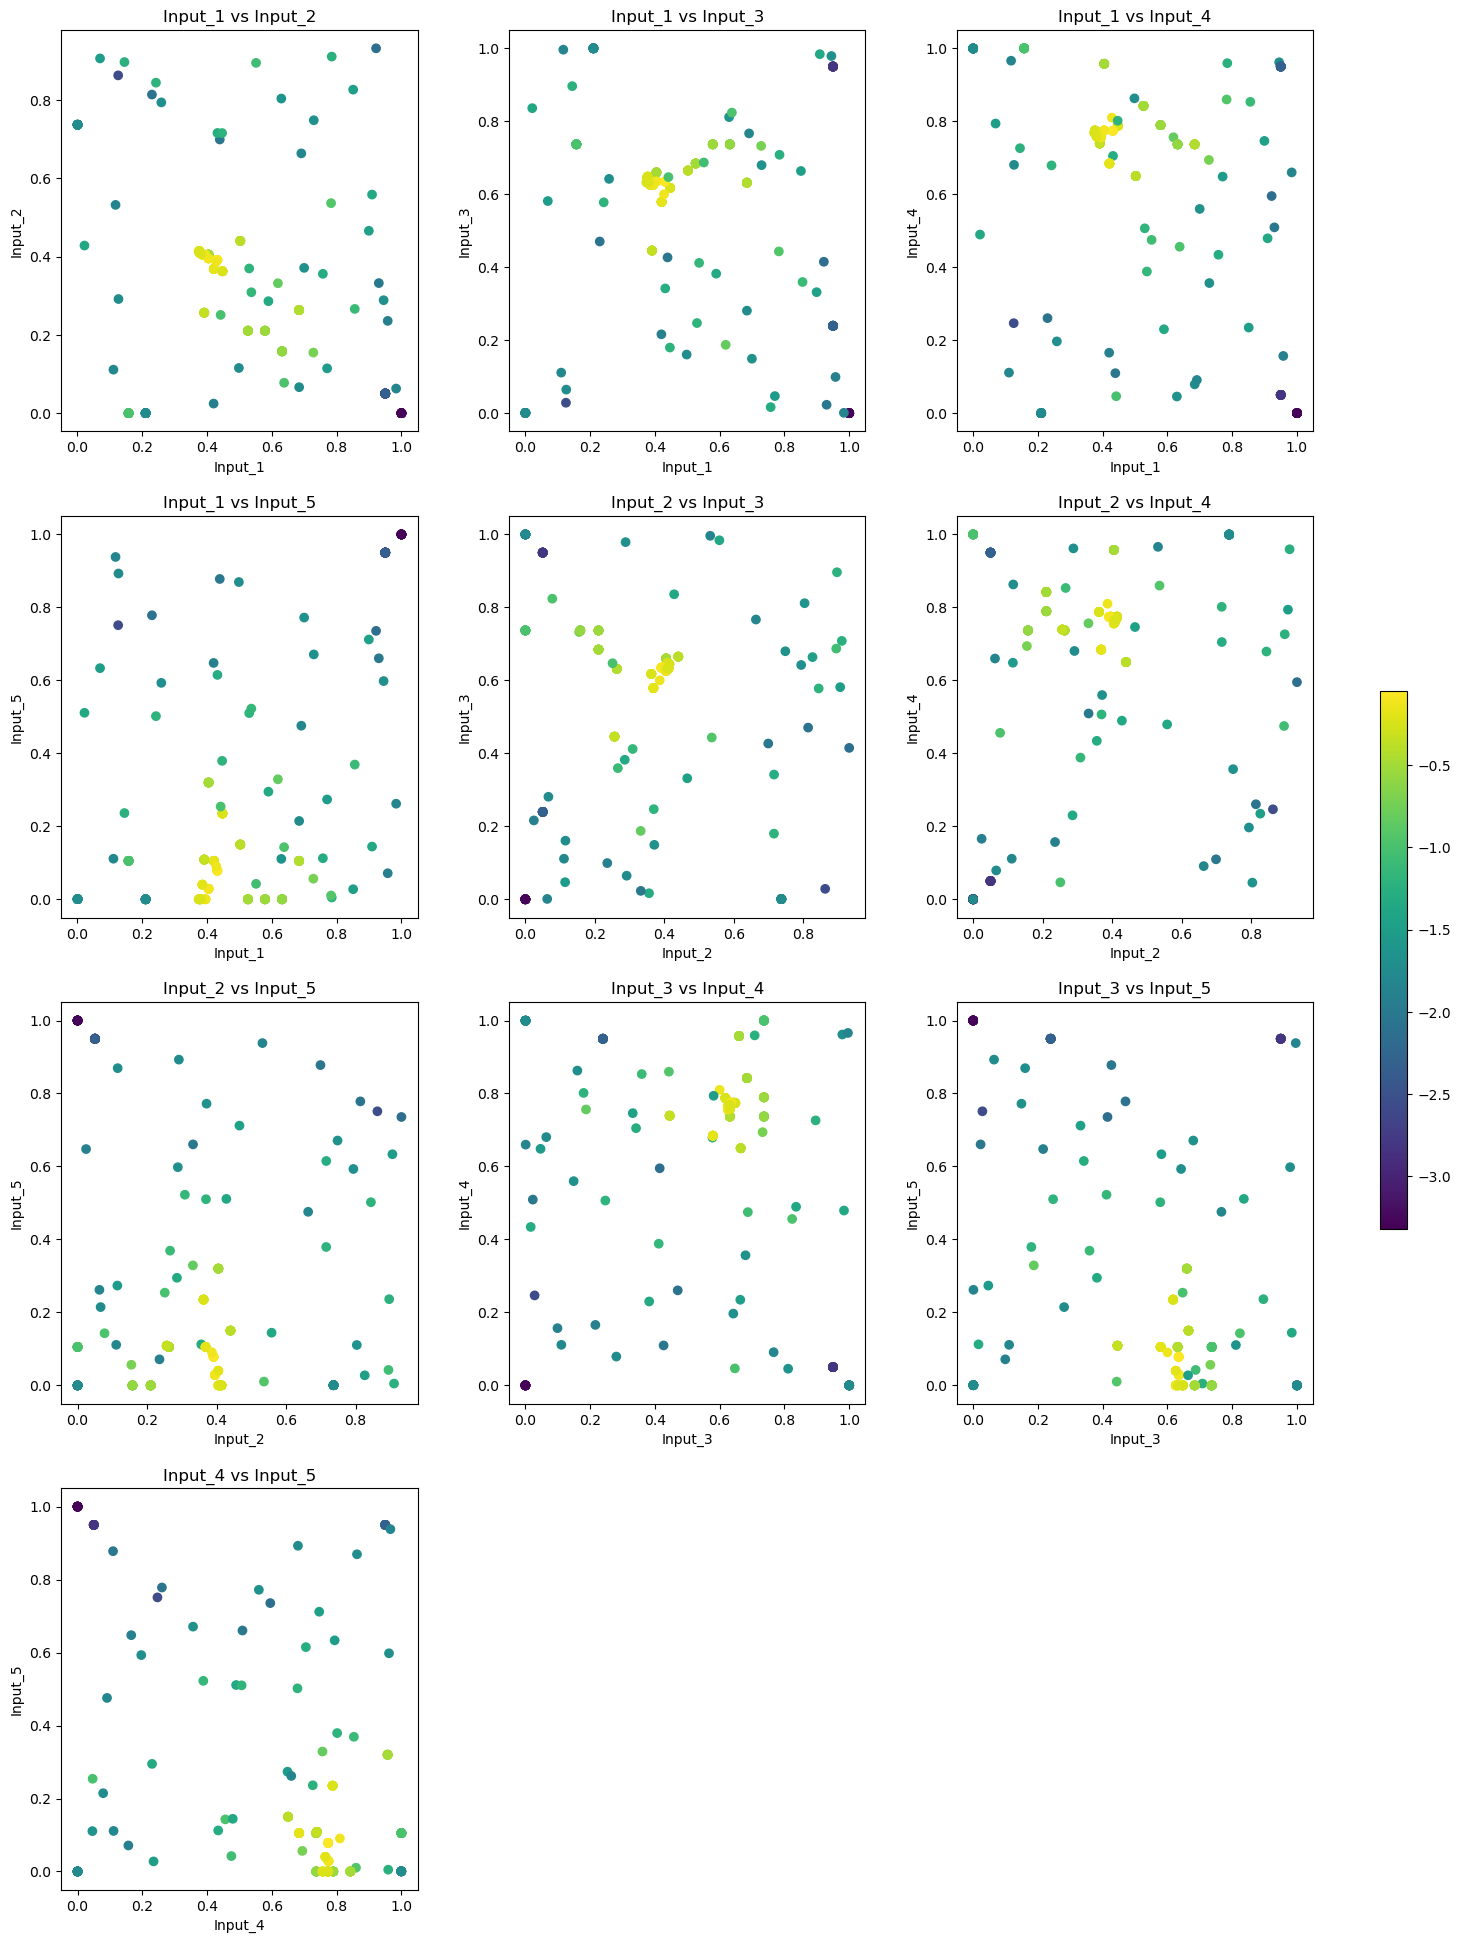

In [11]:
from itertools import combinations

# Calculate all pair combinations of input columns
input_columns = df.columns[df.columns.str.startswith('Input')]  # Select only columns that start with 'Input'
pair_combinations = list(combinations(input_columns, 2))  # Get all combinations of Input columns taken 2 at a time

# Determine the grid size for subplots
num_plots = len(pair_combinations)
num_cols = 3  # Set number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows needed, round up

# Create a figure with subplots in a grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))  # Adjust figure size as needed
fig.tight_layout(pad=4.0)  # Add spacing between plots

# Flatten axes array for easier iteration if it's 2D
axes = axes.flatten()

# Plotting each combination in the grid
for i, (x_col, y_col) in enumerate(pair_combinations):
    ax = axes[i]
    scatter = ax.scatter(df[x_col], df[y_col], c=df['Output'], cmap='viridis')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{x_col} vs {y_col}')

# Add a colorbar to the last plot
fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=.02)

# Turn off axes for any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

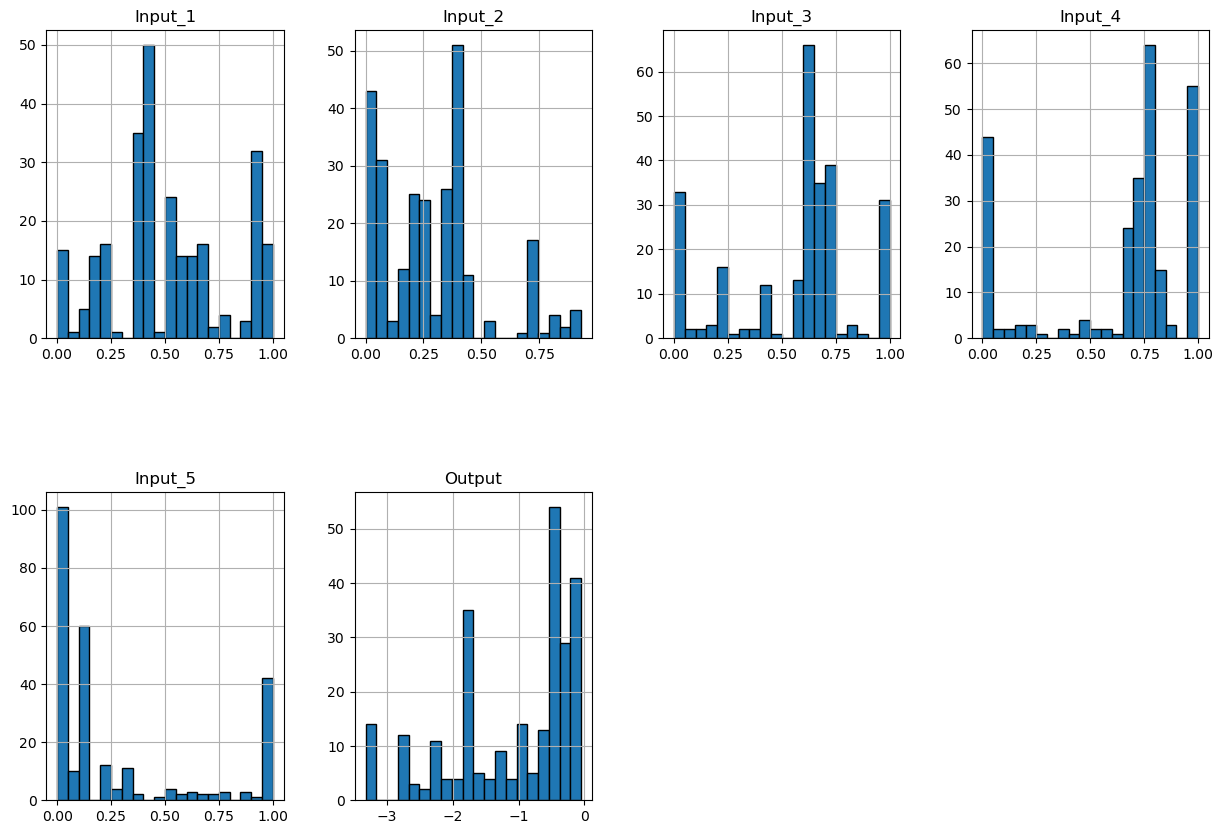

In [12]:
# Plot histograms for each column to understand distributions
df.hist(bins=20, figsize=(15, 10), layout=(-1, 4), edgecolor='black')
plt.subplots_adjust(hspace=0.5)
plt.show()

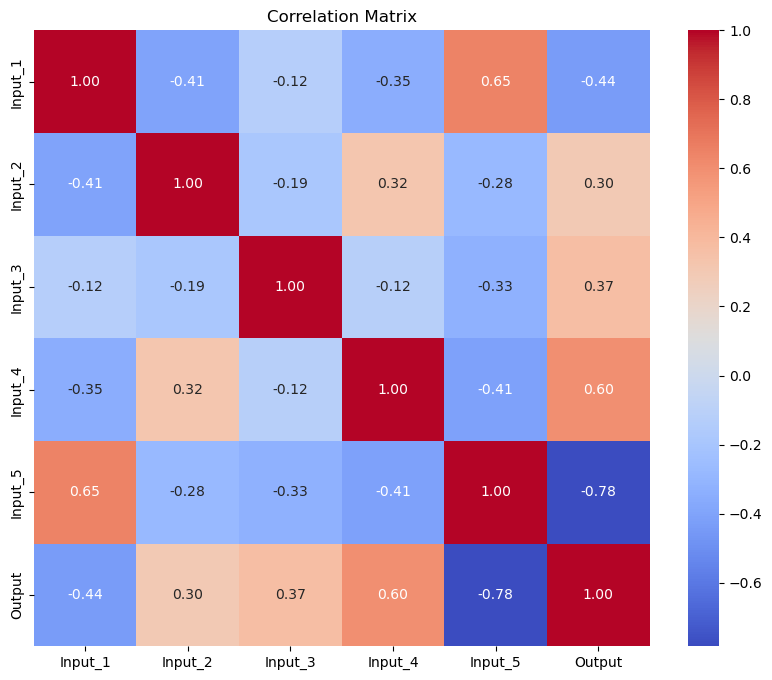

In [13]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

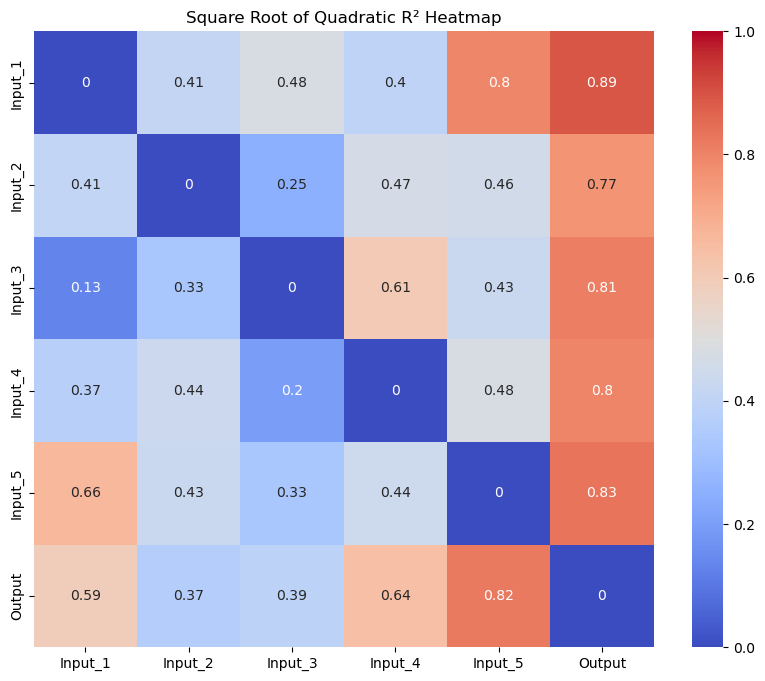

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def compute_quadratic_sqrt_r2(x, y):
    x = x[:, np.newaxis]
    polynomial_features = PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    
    return np.sqrt(r2_score(y, y_poly_pred))

def quadratic_sqrt_r2_matrix(data):
    cols = data.columns
    sqrt_r2_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)
    
    for i in range(len(cols)):
        for j in range(len(cols)):
            if i != j:
                sqrt_r2_matrix.iloc[i, j] = compute_quadratic_sqrt_r2(data[cols[i]].values, data[cols[j]].values)
    
    return sqrt_r2_matrix

def plot_heatmap(sqrt_r2_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(sqrt_r2_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
    plt.title('Square Root of Quadratic R² Heatmap')
    plt.show()


# Compute square root of R² matrix
sqrt_r2_matrix = quadratic_sqrt_r2_matrix(df)

# Plot heatmap
plot_heatmap(sqrt_r2_matrix)

/opt/anaconda3/envs/sklearn_env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


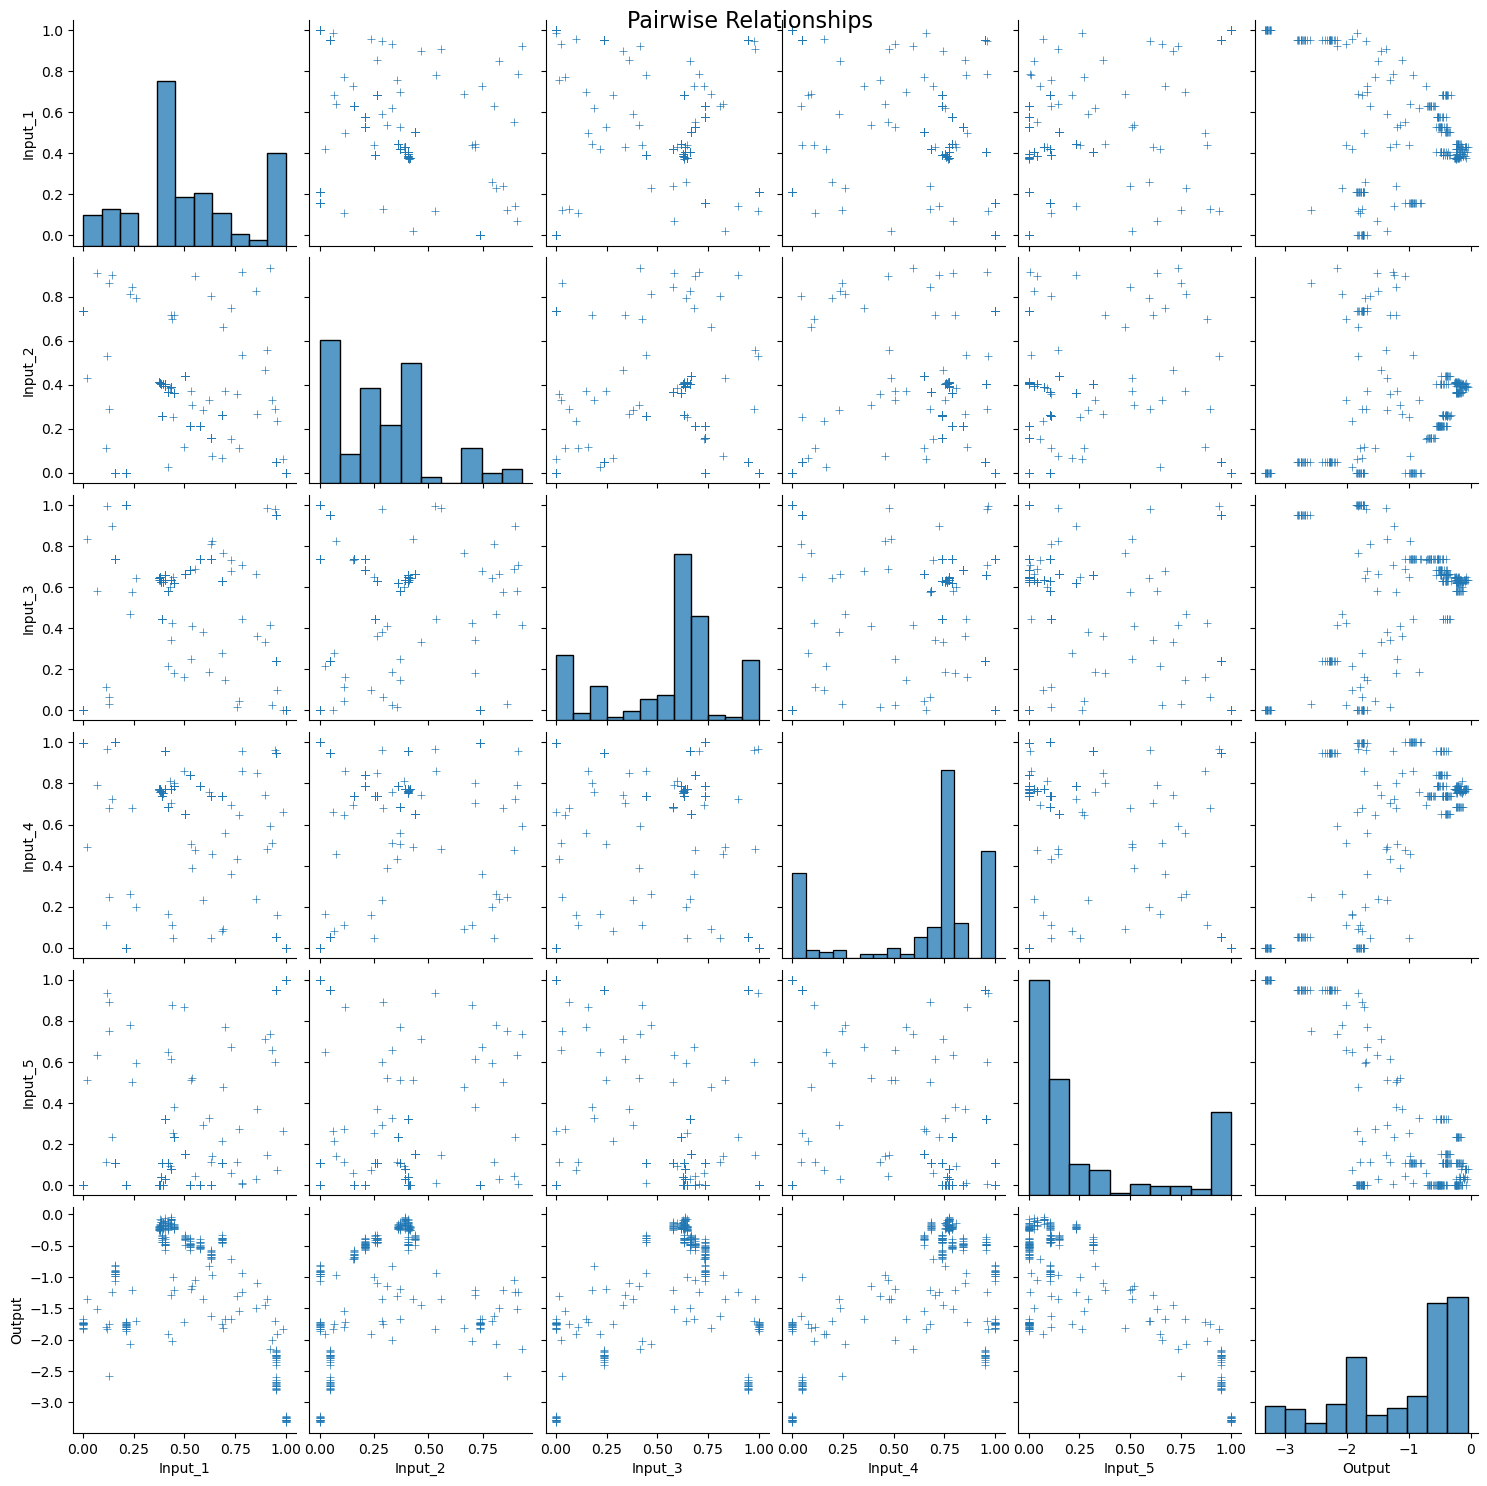

In [15]:
# Use pairplot to visualize the relationships between variables
sns.pairplot(df, kind='scatter', diag_kind='hist', markers='+')
plt.suptitle('Pairwise Relationships', verticalalignment='baseline', fontsize=16)
plt.show()

# New model / with batch loop for prediction

In [28]:
# New model / with batch loop for prediction

import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_lcb, gaussian_ei, gaussian_pi
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import warnings
from sklearn.exceptions import ConvergenceWarning
from itertools import combinations

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Assuming df is already loaded with data

X = df.drop(columns=['Output'])
y = df[['Output']]

# Standardize inputs and outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 0.5, name='length_scale'),
    Real(1e-12, 1e-1, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X_scaled, y_scaled)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=32)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")

# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale) + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X_scaled, y_scaled)

# Flexible grid setup for predictions
def generate_grid(ranges, num_points):
    grid_axes = [np.linspace(start, end, num_points) for start, end in ranges]
    grid = np.array(list(it.product(*grid_axes)))
    return grid

#****
# Define custom ranges for each input
# Modify these ranges as needed
input_ranges = [
    (0.000001, 0.99999),  # Range for Input_1
    (0.000001, 0.999999),  # Range for Input_2
    (0.000001, 0.999999),   # Range for Input_3
    (0.000001, 0.999999),   # Range for Input_4
    (0.000001, 0.999999)   # Range for Input_5
]

si=1
if si==1:
    input_ranges = [
        (0.360001, 0.450000),  # Range for Input_1
        (0.370001, 0.440000),  # Range for Input_2
        (0.600001, 0.660000),   # Range for Input_3
        (0.720001, 0.810000),   # Range for Input_4
        (0.000001, 0.100000)   # Range for Input_5
        # Add more ranges for additional inputs if necessary
    ]
    
# Ensure the number of ranges matches the number of inputs
if len(input_ranges) != X.shape[1]:
    raise ValueError("The number of input ranges must match the number of inputs.")

GG = 22  # Number of data points for each variable in the grid
X_grid = generate_grid(input_ranges, GG)

# Convert to DataFrame with appropriate column names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)
# Scale the grid points
X_grid_scaled = scaler_X.transform(X_grid_df)

print("Grid done")

# Batch size for predictions
batch_size = 1000  # Adjust this size based on your memory capacity

# Predictions using the surrogate model in batches
mean_scaled_list = []
std_scaled_list = []

for i in range(0, X_grid_scaled.shape[0], batch_size):
    batch_end = i + batch_size
    X_batch = X_grid_scaled[i:batch_end]
    mean_batch, std_batch = GPR_model_best.predict(X_batch, return_std=True)
    mean_scaled_list.append(mean_batch)
    std_scaled_list.append(std_batch)

# Concatenate all batches
mean_scaled = np.concatenate(mean_scaled_list, axis=0).reshape(-1, 1)
std_scaled = np.concatenate(std_scaled_list, axis=0)

# Inverse transform the mean predictions
mean = scaler_y.inverse_transform(mean_scaled).flatten()
std = std_scaled * scaler_y.scale_[0]  # Scale standard deviation appropriately

# Acquisition function: UCB
beta = 0.01
acquisition_function_ucb = mean + beta * std

# Find the next query point (UCB)
idx_max_ucb = np.argmax(acquisition_function_ucb)
next_query_ucb = X_grid[idx_max_ucb]
formatted_row_ucb = '-'.join(format(x, ".6f") for x in next_query_ucb)
print(f"Next query point UCB with Beta {beta}: [{formatted_row_ucb}]")

# Calculate and collect query points
query_points = [
    (next_query_ucb, 'UCB Beta 0.01', 'red', 'o')
]

# Test different beta values for UCB and other acquisition functions
for beta, color, marker in zip([1.00, 1.96, 2.6,4], ['blue', 'green', 'purple','red'], ['x', 's', 'd','x']):
    acquisition_function = mean + beta * std
    idx_max = np.argmax(acquisition_function)
    next_query = X_grid[idx_max]
    query_points.append((next_query, f'UCB Beta {beta}', color, marker))
    formatted_row = '-'.join(format(x, ".6f") for x in next_query)
    print(f"Next query point UCB with Beta {beta}: [{formatted_row}]")

Best length scale: 0.034435448141244426
Best noise level: 1e-12
Grid done
Next query point UCB with Beta 0.01: [0.441429-0.386667-0.600001-0.810000-0.085714]
Next query point UCB with Beta 1.0: [0.450000-0.393334-0.600001-0.810000-0.080953]
Next query point UCB with Beta 1.96: [0.450000-0.403334-0.600001-0.810000-0.076191]
Next query point UCB with Beta 2.6: [0.450000-0.413334-0.600001-0.810000-0.066667]
Next query point UCB with Beta 4: [0.450000-0.440000-0.600001-0.810000-0.042858]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


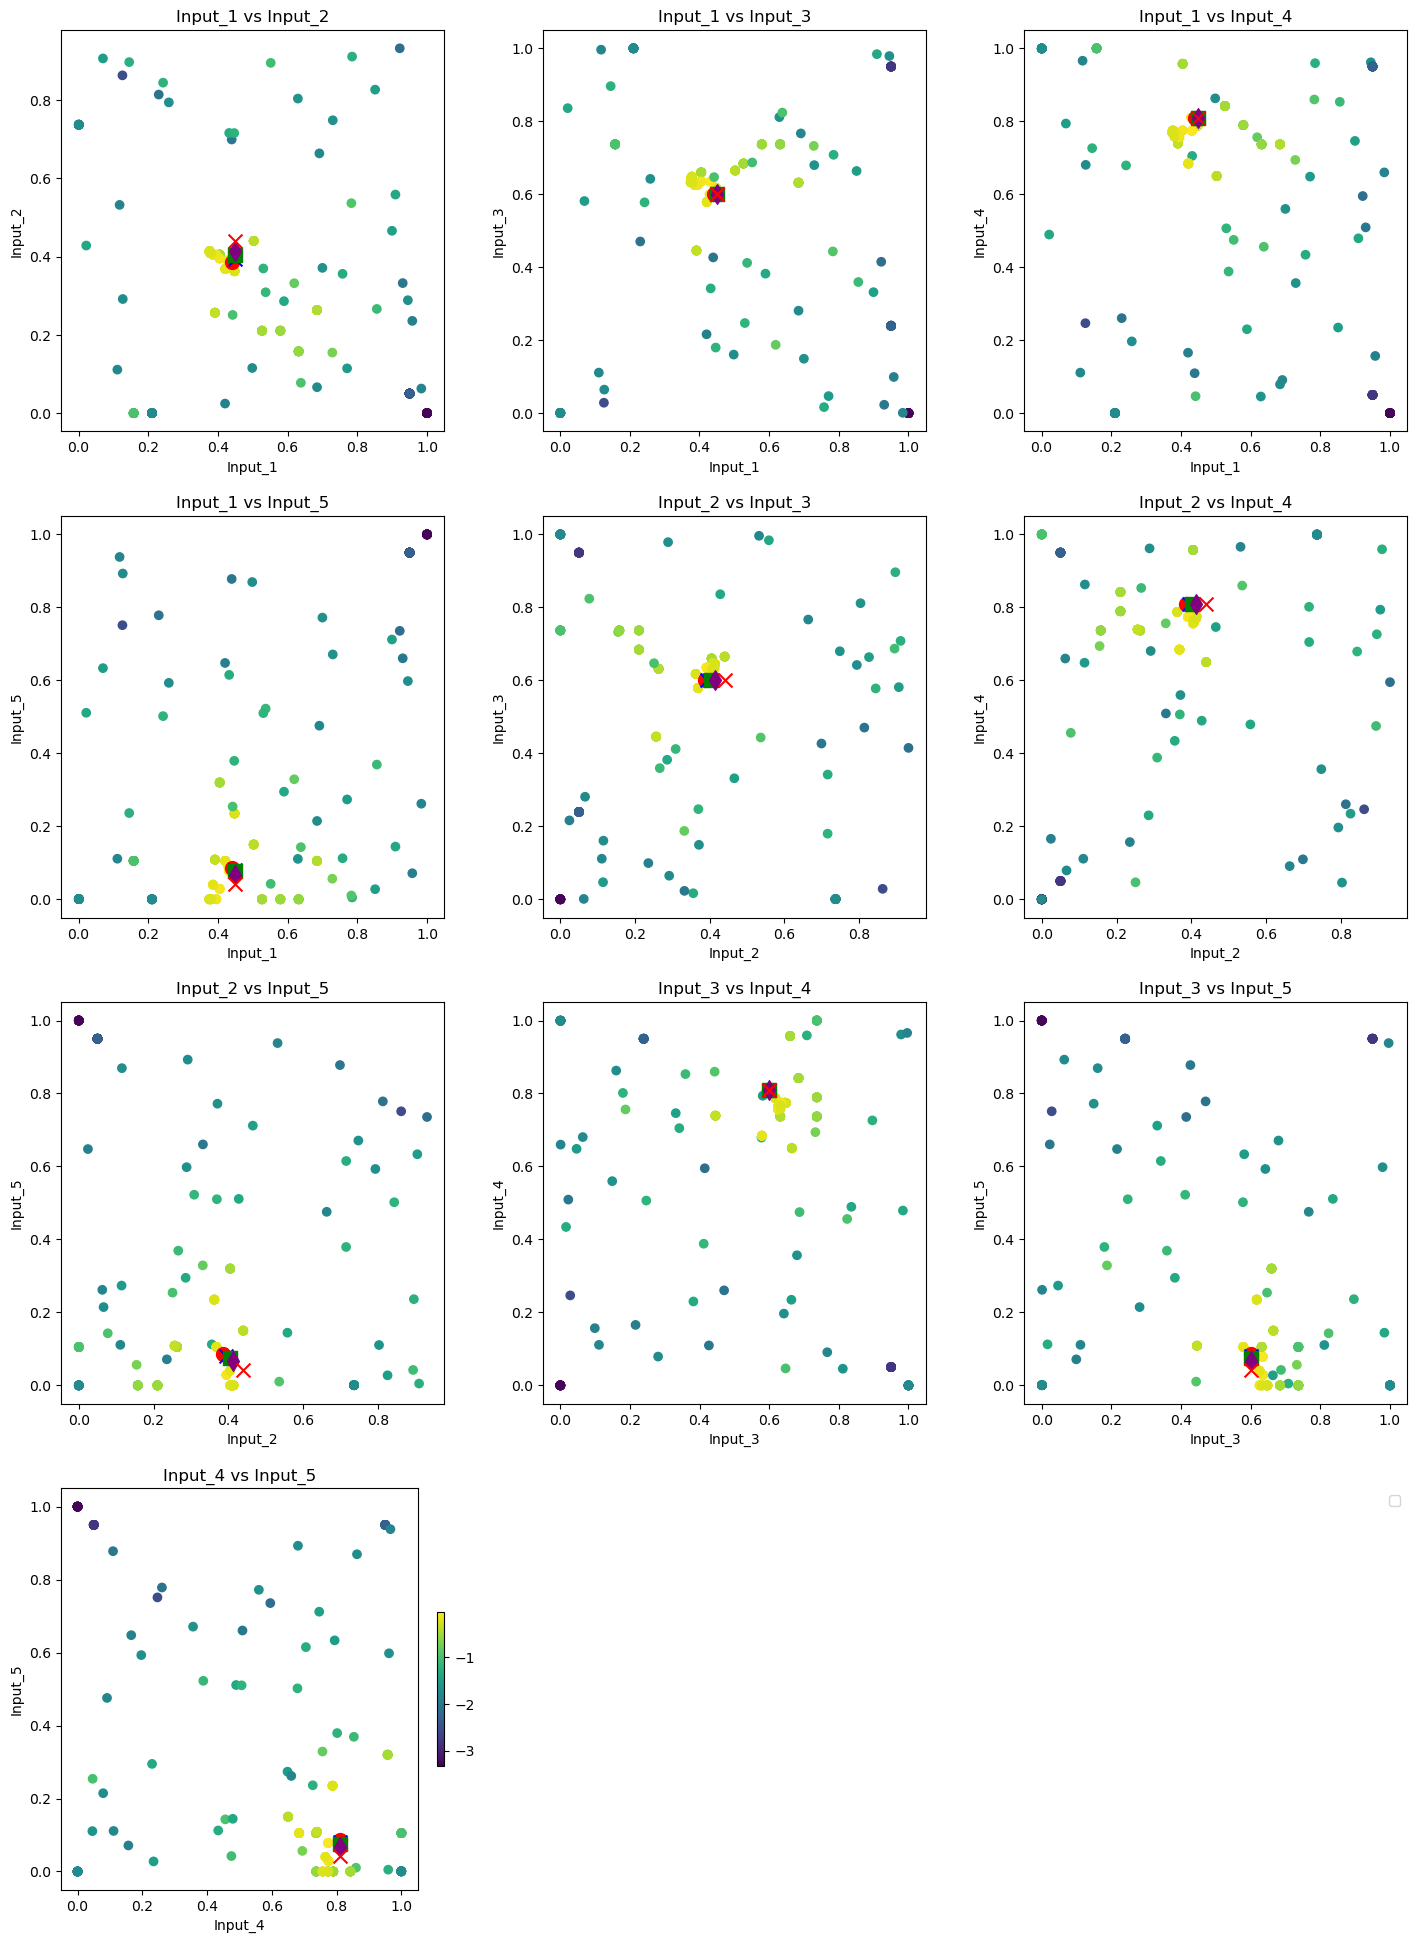

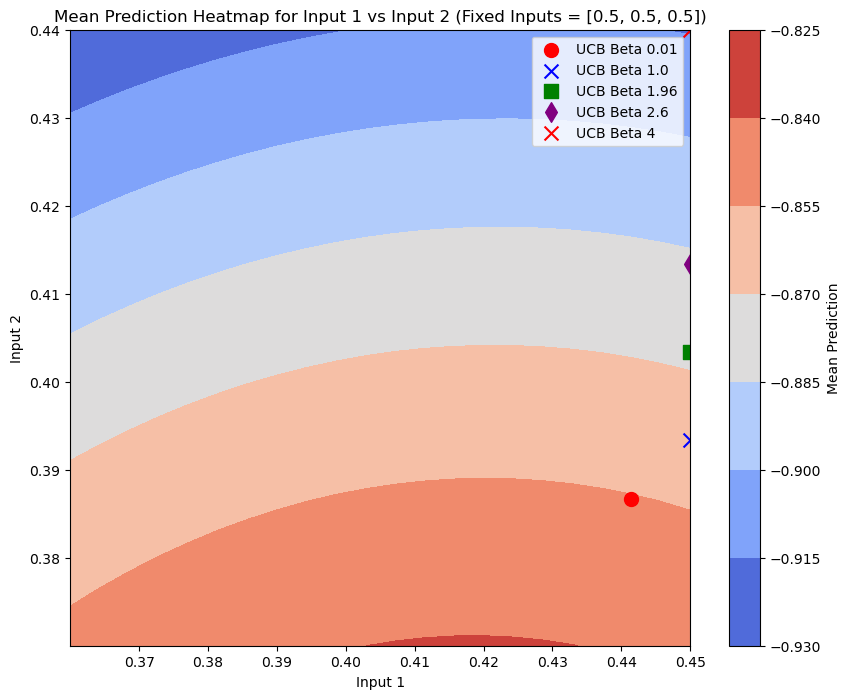

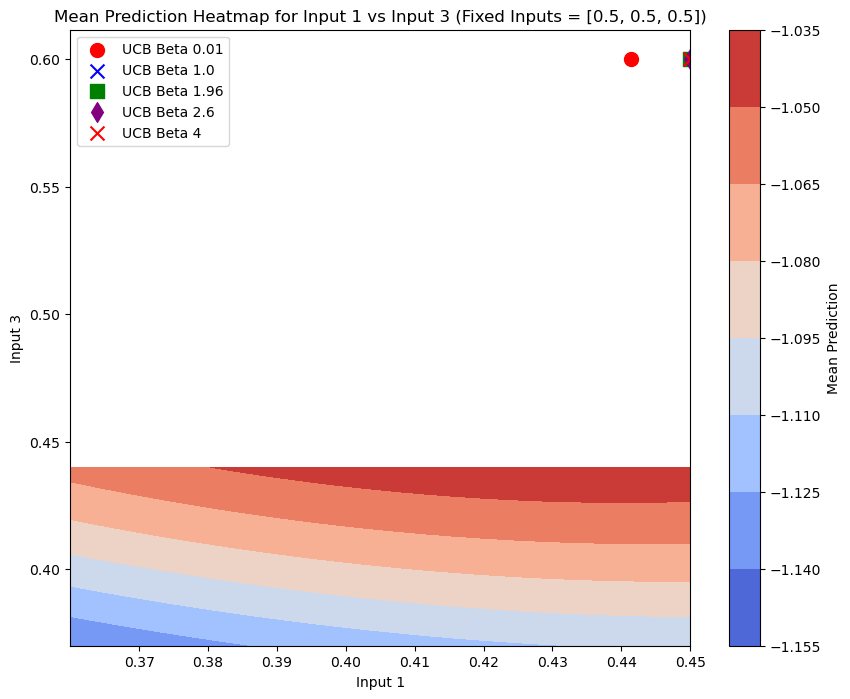

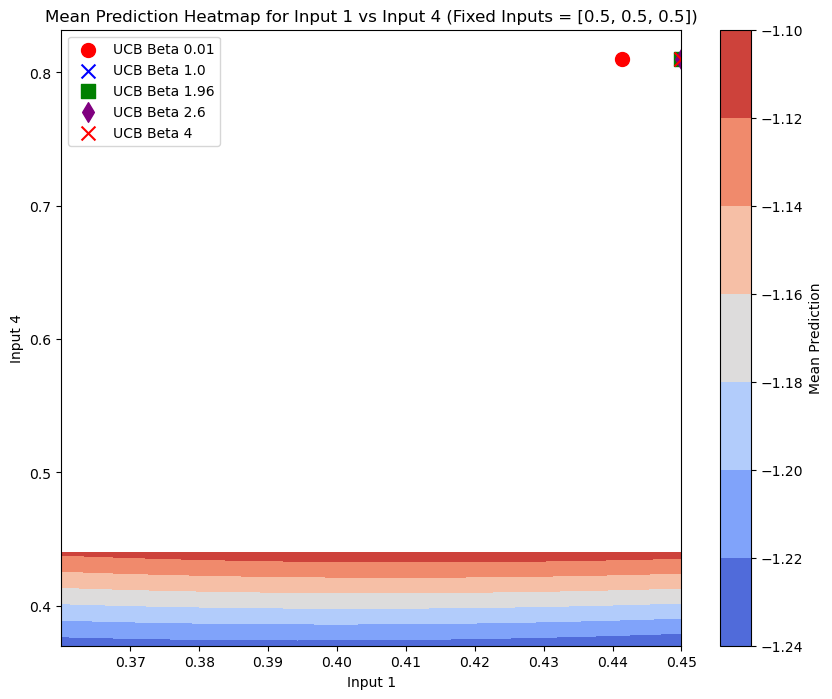

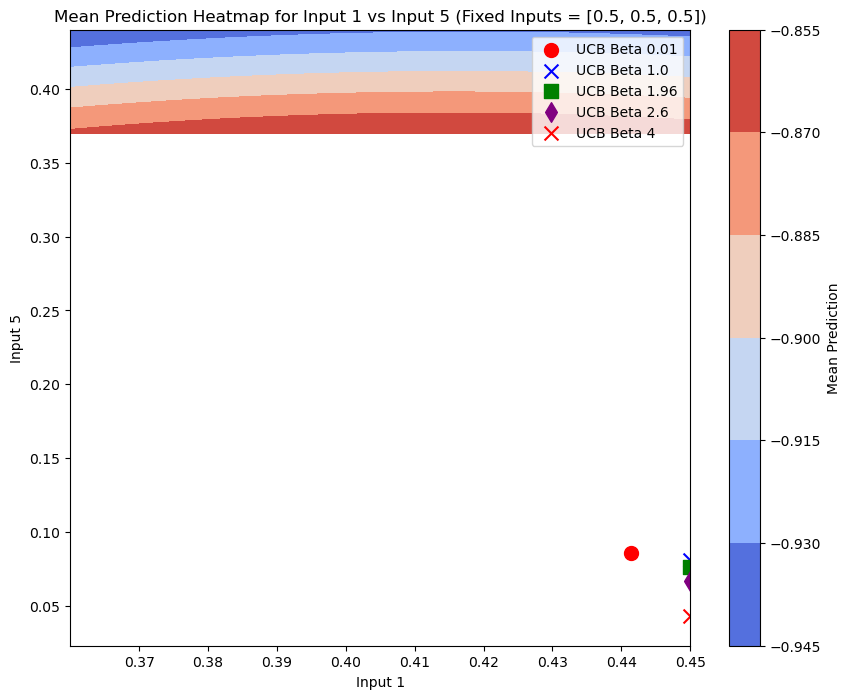

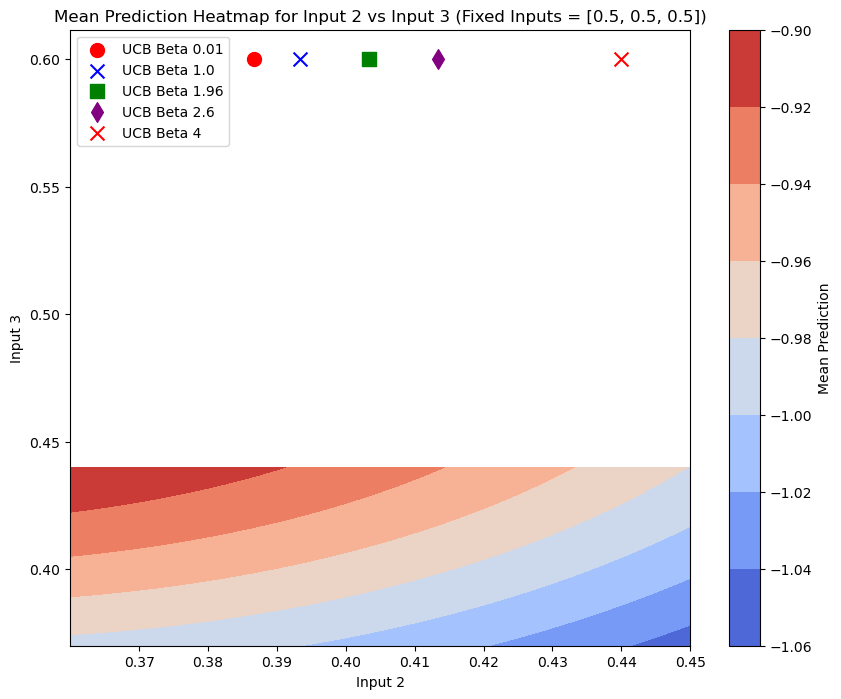

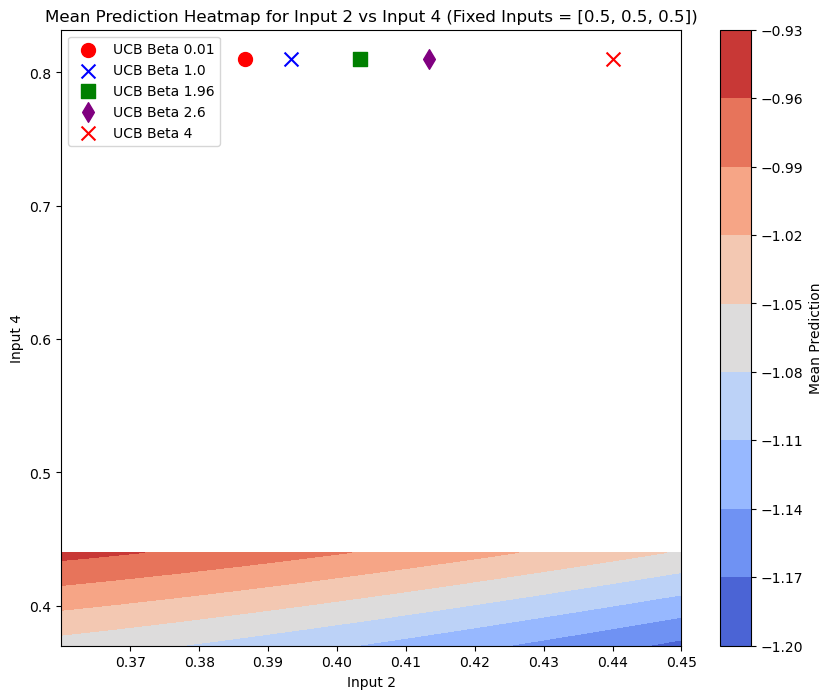

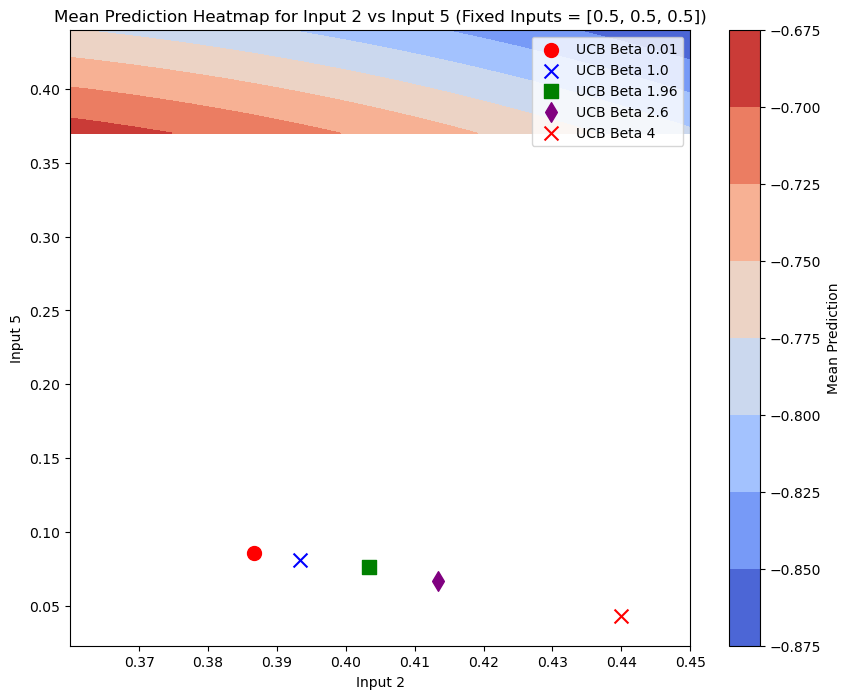

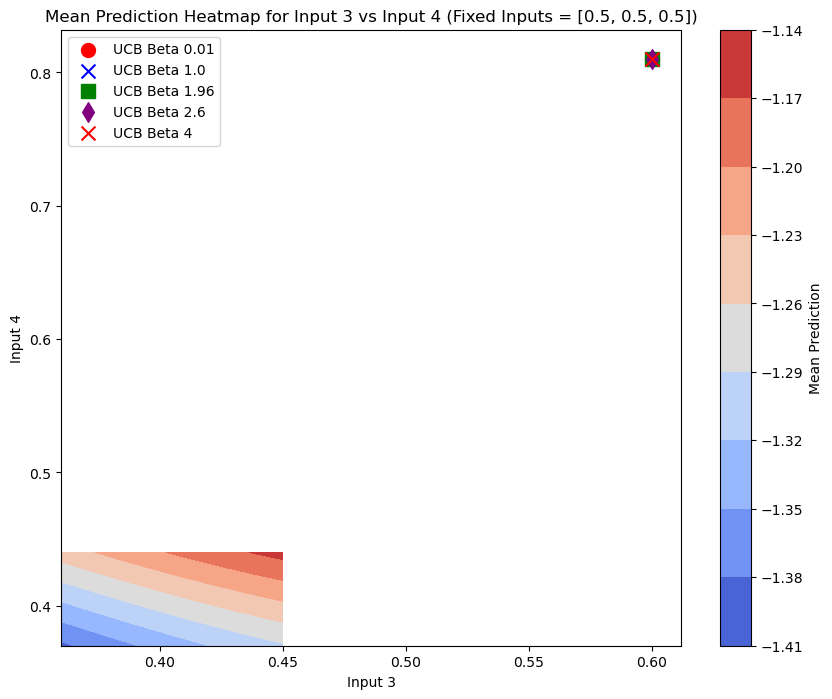

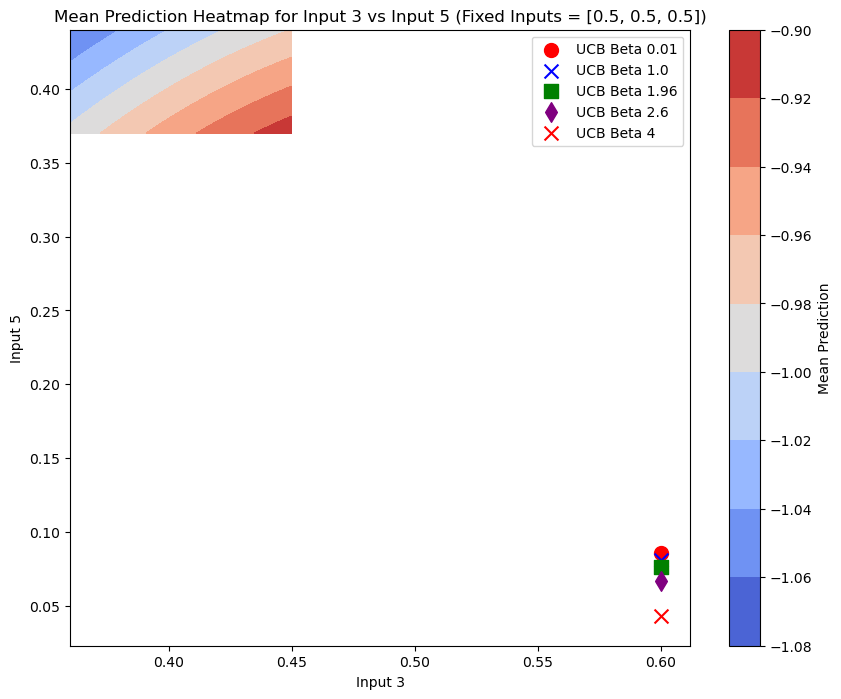

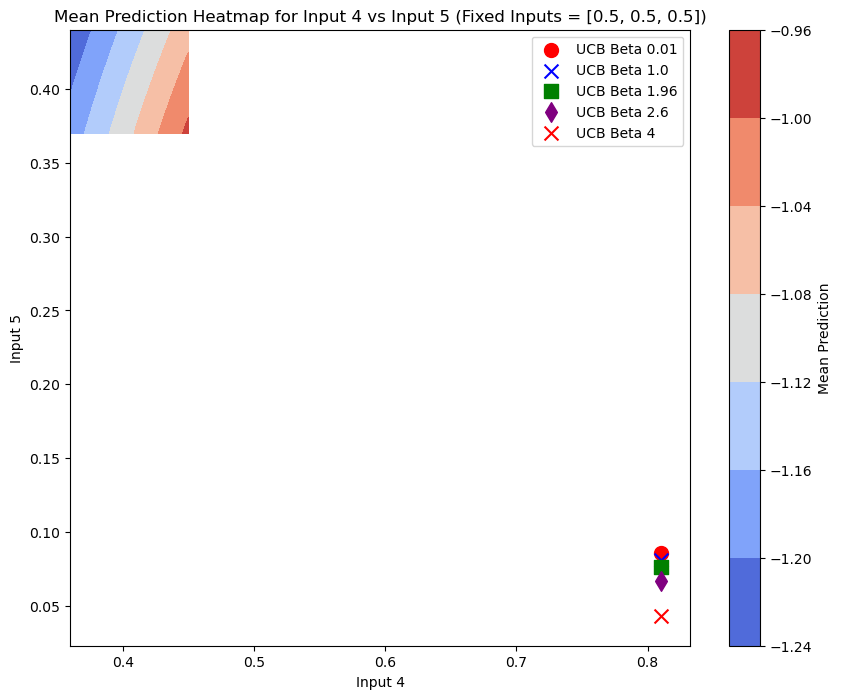

In [29]:
# Visualization function to include pairwise scatter plots and heatmaps
def visualize_data(X_original, y_original, X_grid, query_points, input_ranges):
    num_inputs = X_original.shape[1]
    
    # Pairwise scatter plots with color gradient and query points
    if num_inputs > 1:
        input_columns = X_original.columns
        pair_combinations = list(combinations(input_columns, 2))
        num_plots = len(pair_combinations)
        num_cols = 3
        num_rows = (num_plots + num_cols - 1) // num_cols

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
        fig.tight_layout(pad=4.0)
        axes = axes.flatten()

        for i, (x_col, y_col) in enumerate(pair_combinations):
            ax = axes[i]
            scatter = ax.scatter(X_original[x_col], X_original[y_col], c=y_original.values.flatten(), cmap='viridis')
            ax.set_xlabel(x_col)
            ax.set_ylabel(y_col)
            ax.set_title(f'{x_col} vs {y_col}')
            
            for query, label, color, marker in query_points:
                ax.scatter(query[input_columns.get_loc(x_col)], query[input_columns.get_loc(y_col)], color=color, marker=marker, s=100, label=label)
            
            if i == num_plots - 1:
                fig.colorbar(scatter, ax=ax, orientation='vertical', fraction=.02)
        
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.legend()
        plt.show()

    # Generate heatmaps for all pairs of inputs
    for (i, j) in combinations(range(num_inputs), 2):
        fixed_input_values = [0.5] * (num_inputs - 2)
        fixed_indices = [k for k in range(num_inputs) if k != i and k != j]

        X_grid_fixed = generate_grid(input_ranges[:2], GG)
        X_grid_fixed_full = np.zeros((X_grid_fixed.shape[0], num_inputs))
        X_grid_fixed_full[:, [i, j]] = X_grid_fixed
        for idx, fixed_val in zip(fixed_indices, fixed_input_values):
            X_grid_fixed_full[:, idx] = fixed_val

        X_grid_fixed_full_df = pd.DataFrame(X_grid_fixed_full, columns=X_original.columns)
        X_grid_fixed_scaled = scaler_X.transform(X_grid_fixed_full_df)
        mean_fixed_scaled, std_fixed_scaled = GPR_model_best.predict(X_grid_fixed_scaled, return_std=True)
        mean_fixed = scaler_y.inverse_transform(mean_fixed_scaled.reshape(-1, 1)).flatten()

        plt.figure(figsize=(10, 8))
        plt.contourf(X_grid_fixed[:, 0].reshape(GG, GG), X_grid_fixed[:, 1].reshape(GG, GG), mean_fixed.reshape(GG, GG), cmap='coolwarm')
        plt.colorbar(label='Mean Prediction')
        
        for query, label, color, marker in query_points:
            plt.scatter(query[i], query[j], color=color, marker=marker, s=100, label=label)

        plt.title(f'Mean Prediction Heatmap for Input {i+1} vs Input {j+1} (Fixed Inputs = {fixed_input_values})')
        plt.xlabel(f'Input {i+1}')
        plt.ylabel(f'Input {j+1}')
        plt.legend()
        plt.show()

# Call the visualization function using the original data
visualize_data(X, y, X_grid, query_points, input_ranges)

# Old model without batch

In [ ]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_lcb, gaussian_ei, gaussian_pi
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import warnings
from sklearn.exceptions import ConvergenceWarning
from itertools import combinations

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Assuming df is already loaded with data

X = df.drop(columns=['Output'])
y = df[['Output']]

# Standardize inputs and outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 1e-1, name='length_scale'),
    Real(1e-15, 1e-2, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X_scaled, y_scaled)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=32)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")

# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale) + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X_scaled, y_scaled)

# Flexible grid setup for predictions
def generate_grid(ranges, num_points):
    grid_axes = [np.linspace(start, end, num_points) for start, end in ranges]
    grid = np.array(list(it.product(*grid_axes)))
    return grid

#****
# Define custom ranges for each input
# Modify these ranges as needed
input_ranges = [
    (0.000001, 0.99999),  # Range for Input_1
    (0.000001, 0.999999),  # Range for Input_2
    (0.000001, 0.999999),   # Range for Input_3
    (0.000001, 0.999999),   # Range for Input_4
    (0.000001, 0.999999)   # Range for Input_5
]

si=1
if si==1:
    input_ranges = [
        (0.360001, 0.450000),  # Range for Input_1
        (0.370001, 0.440000),  # Range for Input_2
        (0.600001, 0.660000),   # Range for Input_3
        (0.720001, 0.810000),   # Range for Input_4
        (0.000001, 0.100000)   # Range for Input_5
        # Add more ranges for additional inputs if necessary
    ]


# Ensure the number of ranges matches the number of inputs
if len(input_ranges) != X.shape[1]:
    raise ValueError("The number of input ranges must match the number of inputs.")

#****   
    
GG = 22  # Number of data points for each variable in the grid
X_grid = generate_grid(input_ranges, GG)

# Convert to DataFrame with appropriate column names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)
# Scale the grid points
X_grid_scaled = scaler_X.transform(X_grid_df)

# Predictions using the surrogate model
mean_scaled, std_scaled = GPR_model_best.predict(X_grid_scaled, return_std=True)
mean_scaled = mean_scaled.reshape(-1, 1)  # Reshape to 2D array
mean = scaler_y.inverse_transform(mean_scaled).flatten()  # Inverse transform to original scale and flatten to 1D array
std = std_scaled * scaler_y.scale_[0]  # Scale standard deviation appropriately

# Acquisition function: UCB
beta = 1.96
acquisition_function_ucb = mean + beta * std

# Find the next query point (UCB)
idx_max_ucb = np.argmax(acquisition_function_ucb)
next_query_ucb = X_grid[idx_max_ucb]
formatted_row_ucb = '-'.join(format(x, ".6f") for x in next_query_ucb)
print(f"Next query point UCB with Beta {beta}: [{formatted_row_ucb}]")

# Calculate and collect query points
query_points = [
    (next_query_ucb, 'UCB Beta 1.96', 'red', 'o')
]

# Test different beta values for UCB and other acquisition functions
for beta, color, marker in zip([0.01, 1.00, 2.6,4], ['blue', 'green', 'purple','red'], ['x', 's', 'd','x']):
    acquisition_function = mean + beta * std
    idx_max = np.argmax(acquisition_function)
    next_query = X_grid[idx_max]
    query_points.append((next_query, f'UCB Beta {beta}', color, marker))
    formatted_row = '-'.join(format(x, ".6f") for x in next_query)
    print(f"Next query point UCB with Beta {beta}: [{formatted_row}]")



In [ ]:
# Visualization function to include pairwise scatter plots and heatmaps
def visualize_data(X_original, y_original, X_grid, query_points, input_ranges):
    num_inputs = X_original.shape[1]
    
    # Pairwise scatter plots with color gradient and query points
    if num_inputs > 1:
        input_columns = X_original.columns
        pair_combinations = list(combinations(input_columns, 2))
        num_plots = len(pair_combinations)
        num_cols = 3
        num_rows = (num_plots + num_cols - 1) // num_cols

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
        fig.tight_layout(pad=4.0)
        axes = axes.flatten()

        for i, (x_col, y_col) in enumerate(pair_combinations):
            ax = axes[i]
            scatter = ax.scatter(X_original[x_col], X_original[y_col], c=y_original.values.flatten(), cmap='viridis')
            ax.set_xlabel(x_col)
            ax.set_ylabel(y_col)
            ax.set_title(f'{x_col} vs {y_col}')
            
            for query, label, color, marker in query_points:
                ax.scatter(query[input_columns.get_loc(x_col)], query[input_columns.get_loc(y_col)], color=color, marker=marker, s=100, label=label)
            
            if i == num_plots - 1:
                fig.colorbar(scatter, ax=ax, orientation='vertical', fraction=.02)
        
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.legend()
        plt.show()

    # Generate heatmaps for all pairs of inputs
    for (i, j) in combinations(range(num_inputs), 2):
        fixed_input_values = [0.5] * (num_inputs - 2)
        fixed_indices = [k for k in range(num_inputs) if k != i and k != j]

        X_grid_fixed = generate_grid(input_ranges[:2], GG)
        X_grid_fixed_full = np.zeros((X_grid_fixed.shape[0], num_inputs))
        X_grid_fixed_full[:, [i, j]] = X_grid_fixed
        for idx, fixed_val in zip(fixed_indices, fixed_input_values):
            X_grid_fixed_full[:, idx] = fixed_val

        X_grid_fixed_full_df = pd.DataFrame(X_grid_fixed_full, columns=X_original.columns)
        X_grid_fixed_scaled = scaler_X.transform(X_grid_fixed_full_df)
        mean_fixed_scaled, std_fixed_scaled = GPR_model_best.predict(X_grid_fixed_scaled, return_std=True)
        mean_fixed = scaler_y.inverse_transform(mean_fixed_scaled.reshape(-1, 1)).flatten()

        plt.figure(figsize=(10, 8))
        plt.contourf(X_grid_fixed[:, 0].reshape(GG, GG), X_grid_fixed[:, 1].reshape(GG, GG), mean_fixed.reshape(GG, GG), cmap='coolwarm')
        plt.colorbar(label='Mean Prediction')
        
        for query, label, color, marker in query_points:
            plt.scatter(query[i], query[j], color=color, marker=marker, s=100, label=label)

        plt.title(f'Mean Prediction Heatmap for Input {i+1} vs Input {j+1} (Fixed Inputs = {fixed_input_values})')
        plt.xlabel(f'Input {i+1}')
        plt.ylabel(f'Input {j+1}')
        plt.legend()
        plt.show()

# Call the visualization function using the original data
visualize_data(X, y, X_grid, query_points, input_ranges)